## Física Computacional: Tarea 1
Profesor: Pablo Benítez Llambay

Integrantes:
- Martín Raguileo Reyes
- Fernando Zamora Carrasco

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 1. **Implementación Numérica**

### Modelo de Lotka-Volterra

In [2]:
# Función para modelar la tasa de población de las presas.
def prey_poblation(a: float, b: float, p: int, P: int) -> float:
    """
    Calcula la tasa de cambio de la población de presas según el modelo Lotka-Volterra.

    Parámetros:
    ----------
        a (float): Tasa de crecimiento de las presas.
        b (float): Tasa de depredación.
        p (int): Población de presas.
        P (int): Población de depredadores.

    Retorna:
    -------
        float: Tasa de cambio de la población de presas.
    """
    return (a * p) - (b * p * P)

# Función para modelar la tasa de población de los depredadores.
def depr_poblation(b: float, m: float, p: int, P: int, eps: float) -> float:
    """
    Calcula la tasa de cambio de la población de depredadores según el modelo Lotka-Volterra.

    Parámetros:
    ----------
        b (float): Tasa de depredación.
        m (float): Tasa de mortalidad de depredadores.
        p (int): Población de presas.
        P (int): Población de depredadores.
        eps (float): Eficiencia de conversión de presas en depredadores.

    Retorna:
    -------
        float: Tasa de cambio de la población de depredadores.
    """
    return (eps * b * p * P) - (m * P)

# Función para modelar la dinámica del sistema Lotka-Volterra.
def lotka_volterra(t: float, y: list[float], params: dict) -> list[float]:
    """
    Calcula las derivadas de las poblaciones de presas y depredadores en el modelo Lotka-Volterra.

    Parámetros:
    ----------
        t (float): Tiempo actual (no se usa en el cálculo).
        y (list[float]): Lista con las poblaciones actuales [presas, depredadores].
        params (dict): Diccionario con los parámetros del modelo (a, b, m, eps).

    Retorna:
    -------
        list[float]: Lista con las tasas de cambio [dp/dt, dP/dt].
    """
    p, P = y
    a, b, m, eps = params['a'], params['b'], params['m'], params['eps']

    dpdt = prey_poblation(a, b, p, P)
    dPdt = depr_poblation(b, m, p, P, eps)

    return [dpdt, dPdt]

### Funciones para los métodos numéricos

In [3]:
# Implementación del método de Euler.
def euler_step(f: Callable, t: float, y: list[float], dt: float, params: dict) -> list[float]:
    """
    Realiza un paso del método de Euler para resolver una ecuación diferencial ordinaria.

    Parámetros:
    ----------
        f (Callable): Función que calcula las derivadas.
        t (float): Tiempo actual.
        y (list[float]): Lista con los valores actuales de las variables dependientes.
        dt (float): Paso de tiempo.
        params (dict): Diccionario con parámetros adicionales para la función f.

    Retorna:
    -------
        list[float]: Lista con los nuevos valores de las variables dependientes después del paso.
    """
    dydt = f(t, y, params)
    return [y[i] + dt * dydt[i] for i in range(len(y))]

# Implementación del método de Runge-Kutta de segundo orden (RK2).
def rk2_step(f: Callable, t: float, y: list[float], dt: float, params: dict) -> list[float]:
    """
    Realiza un paso del método de Runge-Kutta de segundo orden para resolver una ecuación diferencial ordinaria.

    Parámetros:
    ----------
        f (Callable): Función que calcula las derivadas.
        t (float): Tiempo actual.
        y (list[float]): Lista con los valores actuales de las variables dependientes.
        dt (float): Paso de tiempo.
        params (dict): Diccionario con parámetros adicionales para la función f.

    Retorna:
    -------
        list[float]: Lista con los nuevos valores de las variables dependientes después del paso.
    """
    k1 = [dt * val for val in f(t, y, params)]
    k2 = [dt * val for val in f(t + dt, [y[i] + k1[i] for i in range(len(y))], params)]

    return [y[i] + (k1[i] + k2[i]) / 2 for i in range(len(y))]

# Implementación del método de Runge-Kutta de cuarto orden (RK4).
def rk4_step(f: Callable, t: float, y: list[float], dt: float, params: dict) -> list[float]:
    """
    Realiza un paso del método de Runge-Kutta de cuarto orden para resolver una ecuación diferencial ordinaria.

    Parámetros:
    ----------
        f (Callable): Función que calcula las derivadas.
        t (float): Tiempo actual.
        y (list[float]): Lista con los valores actuales de las variables dependientes.
        dt (float): Paso de tiempo.
        params (dict): Diccionario con parámetros adicionales para la función f.

    Retorna:
    -------
        list[float]: Lista con los nuevos valores de las variables dependientes después del paso.
    """
    k1 = [dt * val for val in f(t, y, params)]
    k2 = [dt * val for val in f(t + (dt/2), [y[i] + (k1[i]/2) for i in range(len(y))], params)]
    k3 = [dt * val for val in f(t + (dt/2), [y[i] + (k2[i]/2) for i in range(len(y))], params)]
    k4 = [dt * val for val in f(t + dt, [y[i] + k3[i]for i in range(len(y))], params)]

    return [y[i] + ((k1[i] + 2*k2[i] + 2*k3[i] + k4[i]) / 6) for i in range(len(y))]

### Comparación de las soluciones de los diferentes métodos numéricos.

#### Simulación del modelo Lotka-Volterra con diferentes métodos numéricos

In [4]:
# Parámetros del modelo Lotka-Volterra. Fueron elegidos de forma arbitraria.
params = {
  'a': 0.05,
  'b': 0.003,
  'm': 0.01,
  'eps': 0.02,
  'K': 1_500
}

# Condiciones iniciales: 40 presas y 25 depredadores.
p0, P0 = 40, 25
y_eu, y_rk2, y_rk4 = [p0, P0], [p0, P0], [p0, P0]

# Configuración de la simulación. Paso de tiempo y número total de pasos.
dt = 0.01
T = 50_000
steps = int(T/dt)

# Listas para almacenar los resultados.
times_eu, times_rk2, times_rk4 = [], [], []
prey_eu, prey_rk2, prey_rk4 = [], [], []
predators_eu, predators_rk2, predators_rk4 = [], [], []

t = 0
for _ in range(steps):
    # Almacenamos los tiempos para cada método.
    times_eu.append(t)
    times_rk2.append(t)
    times_rk4.append(t)

    # Almacenamos las poblaciones de presas para cada método.
    prey_eu.append(y_eu[0])
    prey_rk2.append(y_rk2[0])
    prey_rk4.append(y_rk4[0])

    # Almacenamos las poblaciones de depredadores para cada método.
    predators_eu.append(y_eu[1])
    predators_rk2.append(y_rk2[1])
    predators_rk4.append(y_rk4[1])

    # Actualizamos las poblaciones usando cada método numérico.
    y_eu = euler_step(lotka_volterra, t, y_eu, dt, params)
    y_rk2 = rk2_step(lotka_volterra, t, y_rk2, dt, params)
    y_rk4 = rk4_step(lotka_volterra, t, y_rk4, dt, params)
    t += dt

# Cálculo de las relaciones de equilibrio.
R_e = params['m'] / (params['eps'] * params['b'])
F_e = params['a'] / params['b']

#### Visualización de los resultados

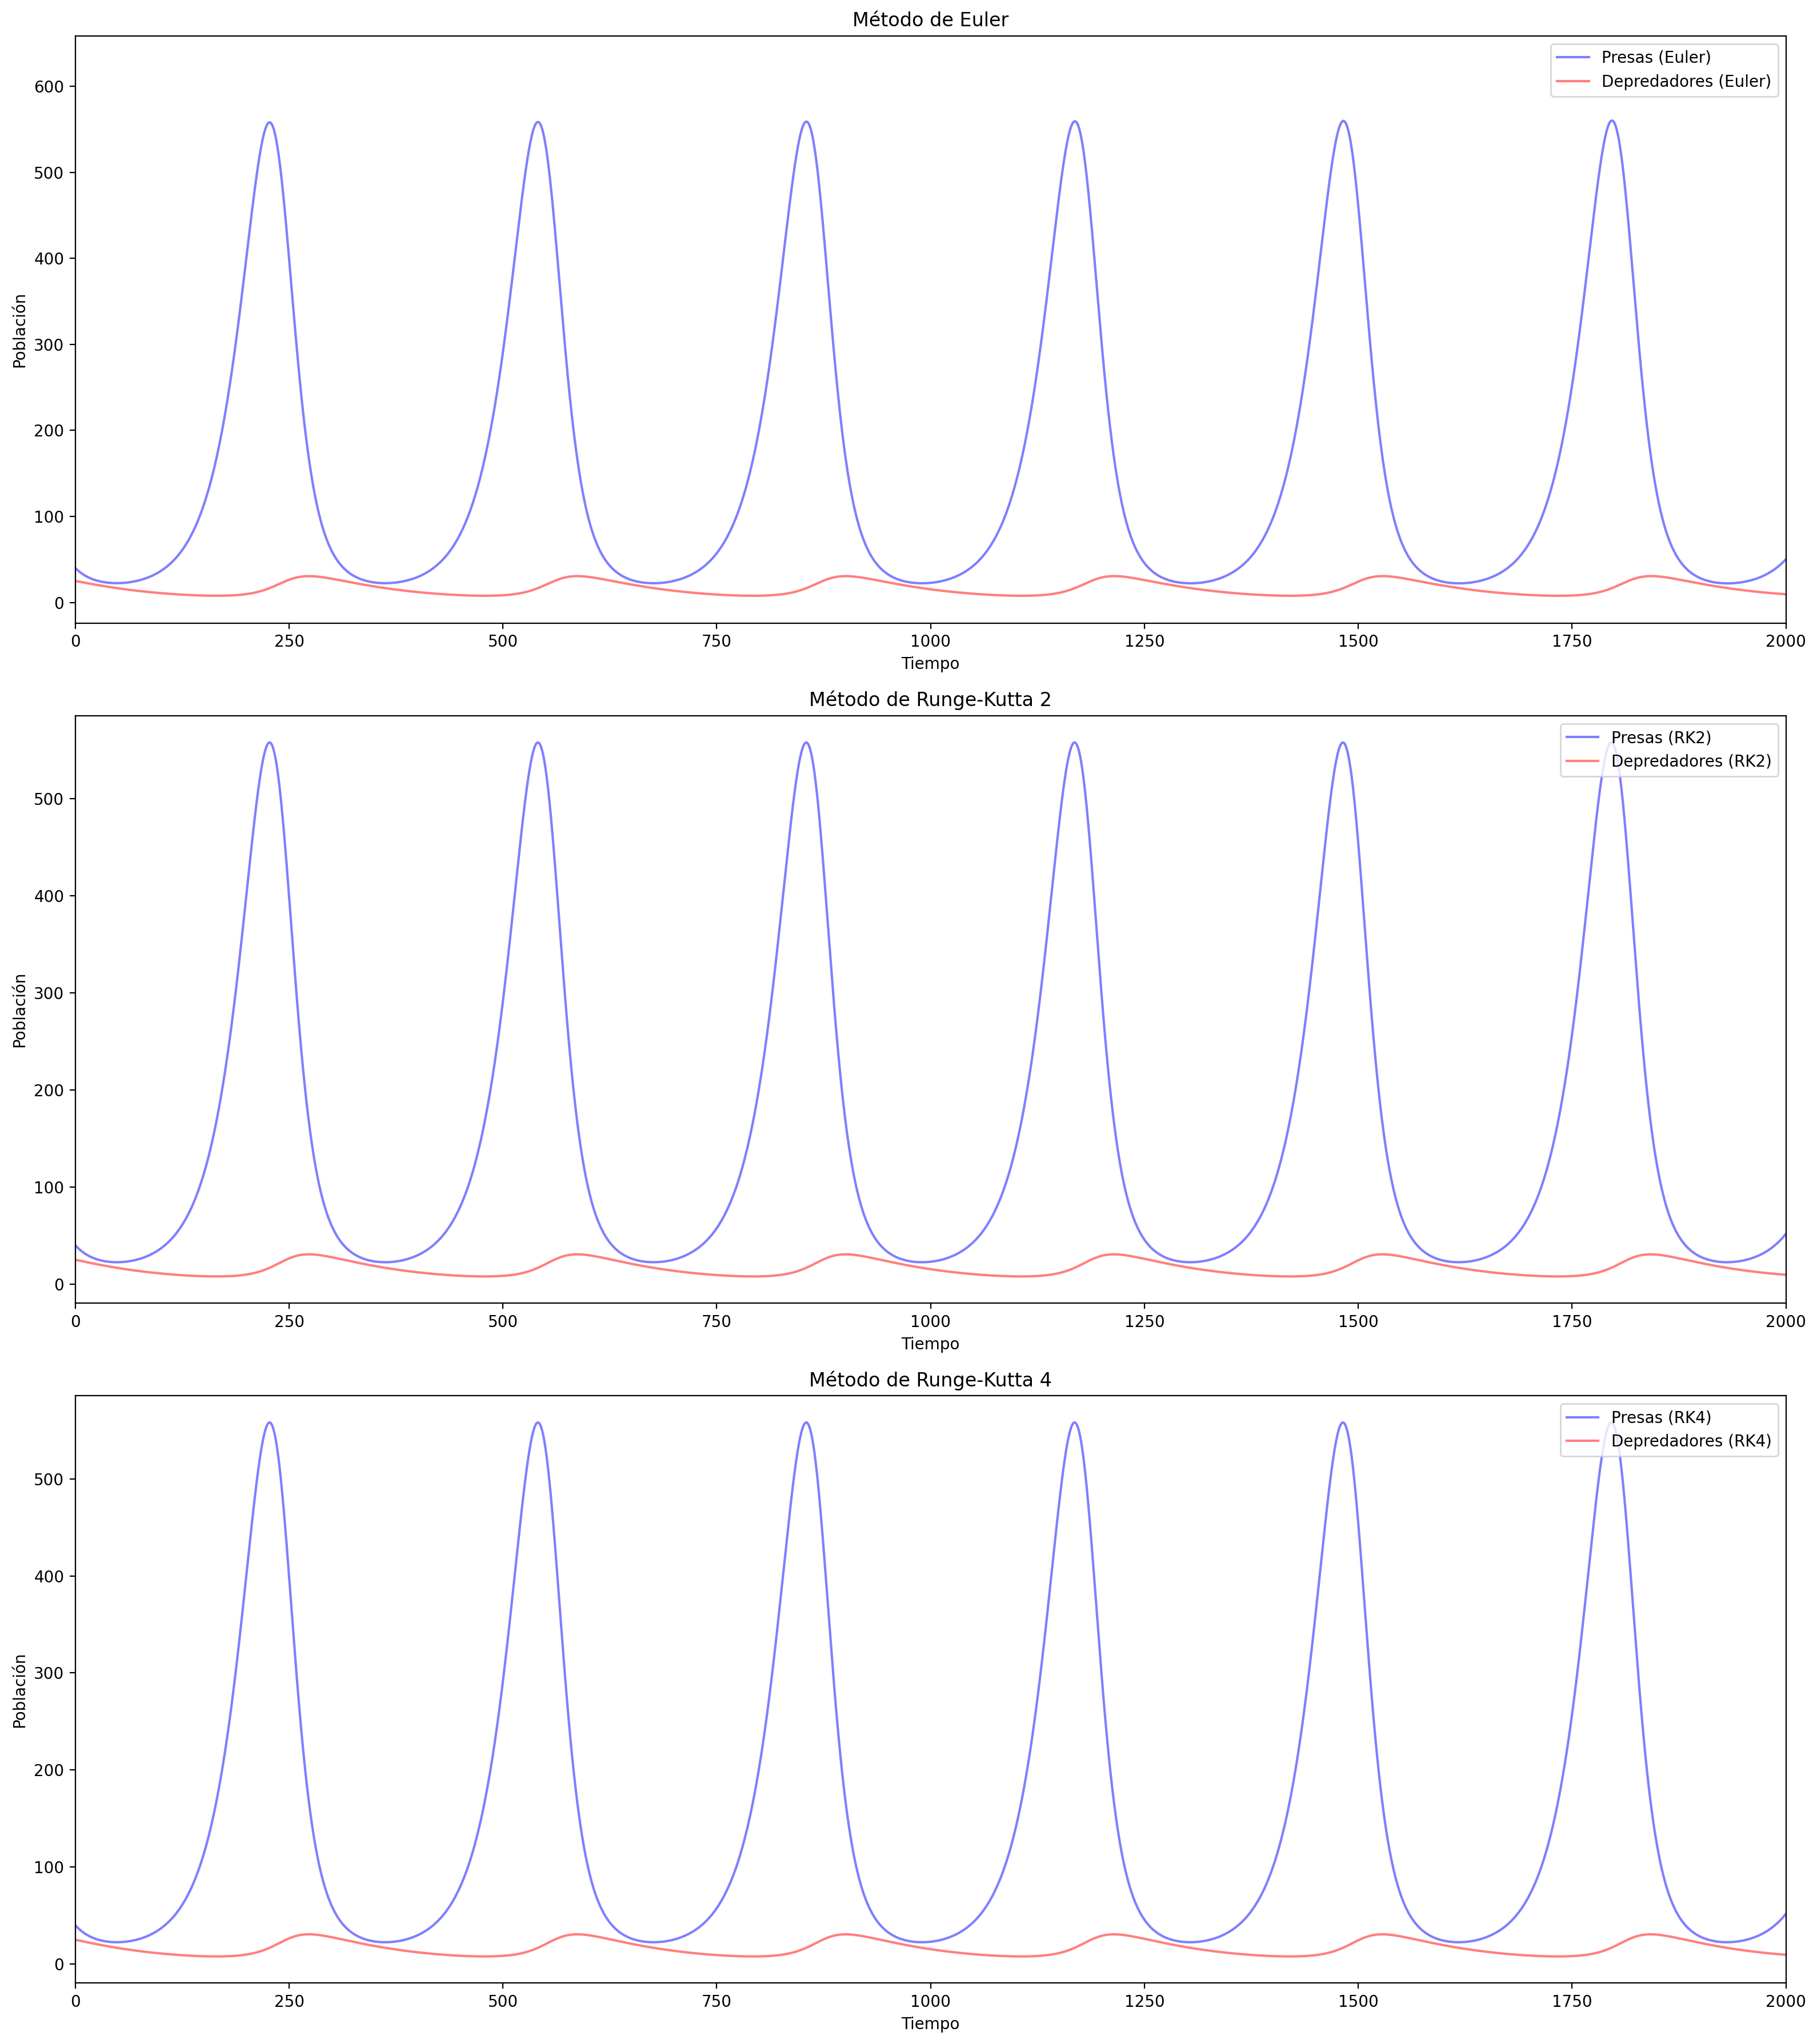

In [5]:
plt.figure(figsize=(16, 18))

plt.subplot(3, 1, 1)
plt.plot(times_eu, prey_eu, label='Presas (Euler)', color='blue', alpha=0.5)
plt.plot(times_eu, predators_eu, label='Depredadores (Euler)', color='red', alpha=0.5)
plt.xlabel('Tiempo')
plt.xlim(0, 2_000)
plt.ylabel('Población')
plt.legend(loc='upper right')
plt.title('Método de Euler')

plt.subplot(3, 1, 2)
plt.plot(times_rk2, prey_rk2, label='Presas (RK2)', color='blue', alpha=0.5)
plt.plot(times_rk2, predators_rk2, label='Depredadores (RK2)', color='red', alpha=0.5)
plt.xlabel('Tiempo')
plt.xlim(0, 2_000)
plt.ylabel('Población')
plt.legend(loc='upper right')
plt.title('Método de Runge-Kutta 2')

plt.subplot(3, 1, 3)
plt.plot(times_rk4, prey_rk4, label='Presas (RK4)', color='blue', alpha=0.5)
plt.plot(times_rk4, predators_rk4, label='Depredadores (RK4)', color='red', alpha=0.5)
plt.xlabel('Tiempo')
plt.xlim(0, 2_000)
plt.ylabel('Población')
plt.legend(loc='upper right')
plt.title('Método de Runge-Kutta 4')

plt.tight_layout()
plt.show();

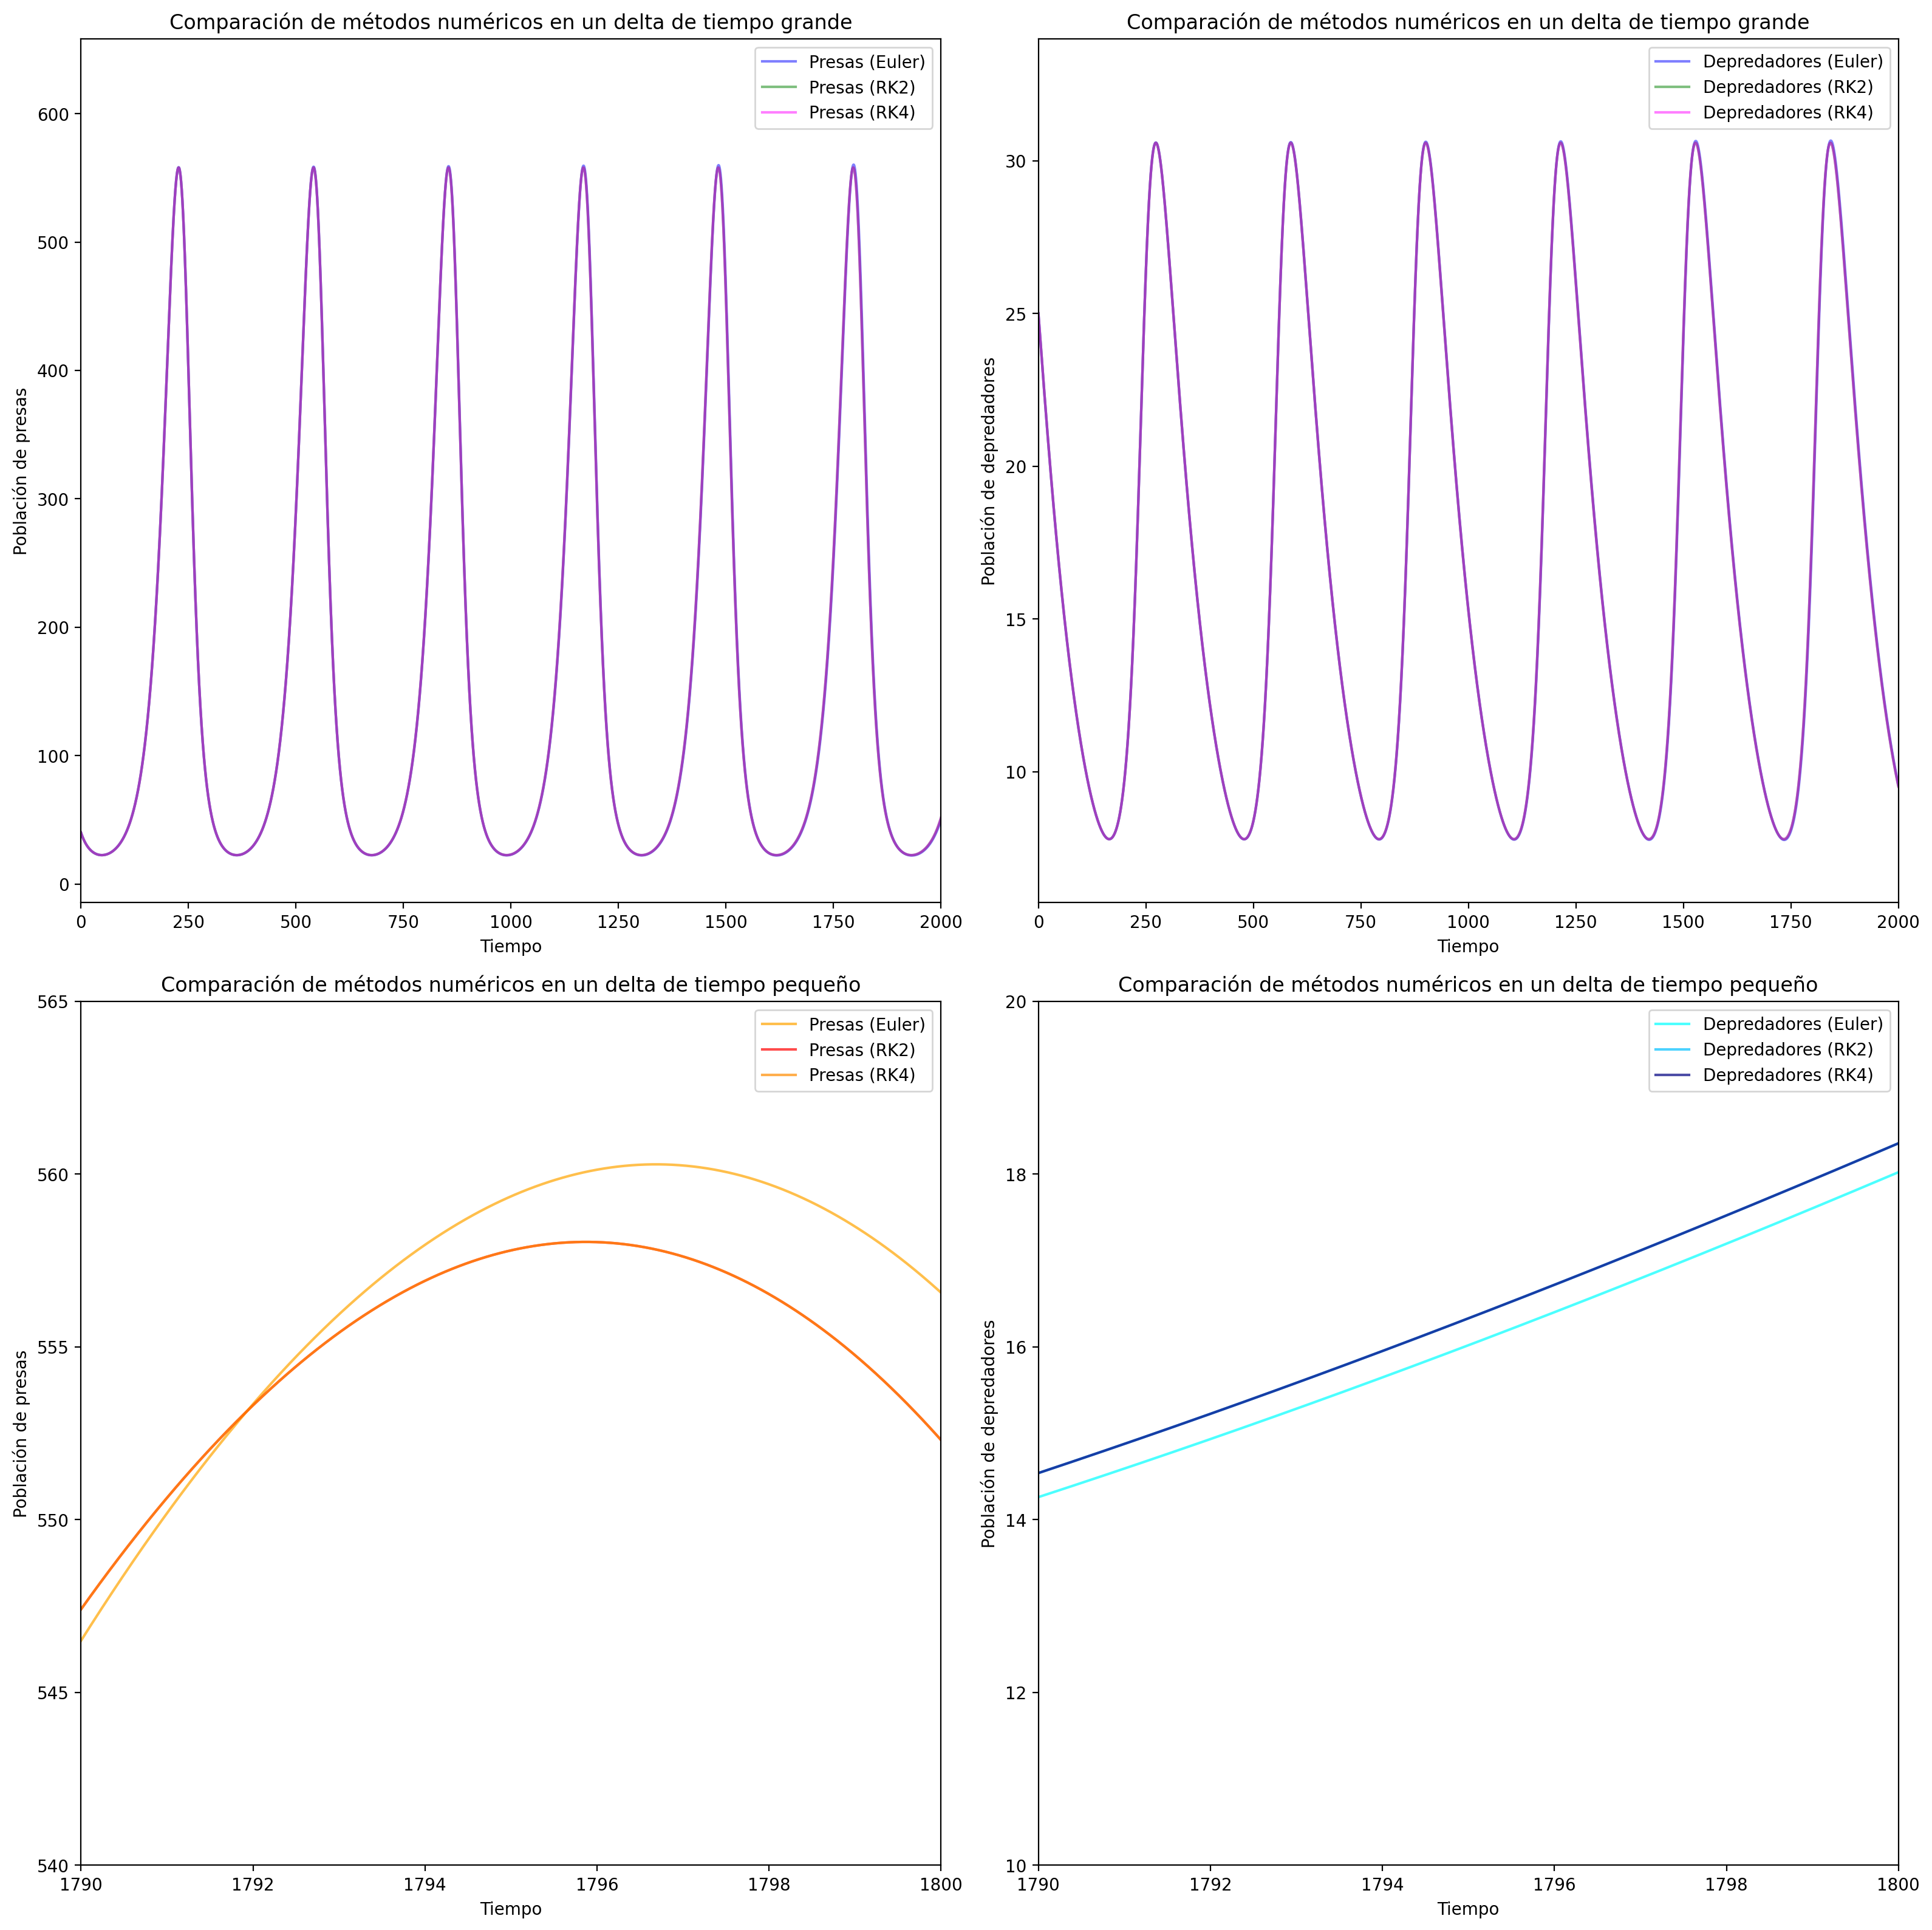

In [6]:
plt.figure(figsize=(16, 16))

plt.subplot(2, 2, 1)
plt.plot(times_eu, prey_eu, label='Presas (Euler)', color='blue', alpha=0.5)
plt.plot(times_rk2, prey_rk2, label='Presas (RK2)', color='green', alpha=0.5)
plt.plot(times_rk4, prey_rk4, label='Presas (RK4)', color='magenta', alpha=0.5)
plt.xlabel('Tiempo')
plt.xlim(0, 2_000)
plt.ylabel('Población de presas')
plt.legend(loc='upper right')
plt.title('Comparación de métodos numéricos en un delta de tiempo grande')

plt.subplot(2, 2, 2)
plt.plot(times_eu, predators_eu, label='Depredadores (Euler)', color='blue', alpha=0.5)
plt.plot(times_rk2, predators_rk2, label='Depredadores (RK2)', color='green', alpha=0.5)
plt.plot(times_rk4, predators_rk4, label='Depredadores (RK4)', color='magenta', alpha=0.5)
plt.xlabel('Tiempo')
plt.xlim(0, 2_000)
plt.ylabel('Población de depredadores')
plt.legend(loc='upper right')
plt.title('Comparación de métodos numéricos en un delta de tiempo grande')

plt.subplot(2, 2, 3)
plt.plot(times_eu, prey_eu, label='Presas (Euler)', color='orange', alpha=0.7)
plt.plot(times_rk2, prey_rk2, label='Presas (RK2)', color='red', alpha=0.7)
plt.plot(times_rk4, prey_rk4, label='Presas (RK4)', color='darkorange', alpha=0.7)
plt.xlabel('Tiempo')
plt.xlim(1_790, 1_800)
plt.ylabel('Población de presas')
plt.ylim(540, 565)
plt.yticks(np.arange(540, 566, 5))
plt.legend(loc='upper right')
plt.title('Comparación de métodos numéricos en un delta de tiempo pequeño')

plt.subplot(2, 2, 4)
plt.plot(times_eu, predators_eu, label='Depredadores (Euler)', color='cyan', alpha=0.7)
plt.plot(times_rk2, predators_rk2, label='Depredadores (RK2)', color='deepskyblue', alpha=0.7)
plt.plot(times_rk4, predators_rk4, label='Depredadores (RK4)', color='navy', alpha=0.7)
plt.xlabel('Tiempo')
plt.xlim(1_790, 1_800)
plt.ylabel('Población de depredadores')
plt.ylim(10, 20)
plt.legend(loc='upper right')
plt.title('Comparación de métodos numéricos en un delta de tiempo pequeño')

plt.tight_layout()
plt.show();

In [7]:
## Acá va a ir una killer animation donde vemos la evolución de las poblaciones a través del tiempo y cómo varían según el método numérico utilizado.
# --- IGNORE ---

## 2. **Análisis del Paso de Tiempo**

In [8]:
def simulate_compare(params: dict, p0: float, P0: float, dt_list: list[float], T: float, save_max_points: int = 10000, clip_negative: bool = False):
    results = {}
    for dt_i in dt_list:
        steps = int(T / dt_i)
        # advertencia si demasiados pasos
        if steps > 5_000_000:
            print(f"Warning: dt={dt_i} -> steps={steps} (muy grande). Considera reducir T o aumentar dt.")
        # decidir cada cuantos pasos guardo (muestreo)
        save_every = max(1, steps // save_max_points)

        # reiniciar condiciones para este dt
        y_eu = [p0, P0]
        y_rk2 = [p0, P0]
        y_rk4 = [p0, P0]

        times = []
        prey_eu = []; prey_rk2 = []; prey_rk4 = []
        pred_eu = []; pred_rk2 = []; pred_rk4 = []

        t = 0.0
        for step in range(steps):
            # guardar cada save_every pasos (incluyendo t=0)
            if step % save_every == 0:
                times.append(t)
                prey_eu.append(y_eu[0])
                prey_rk2.append(y_rk2[0])
                prey_rk4.append(y_rk4[0])
                pred_eu.append(y_eu[1])
                pred_rk2.append(y_rk2[1])
                pred_rk4.append(y_rk4[1])

            # dar un paso
            y_eu = euler_step(lotka_volterra, t, y_eu, dt_i, params)
            y_rk2 = rk2_step(lotka_volterra, t, y_rk2, dt_i, params)
            y_rk4 = rk4_step(lotka_volterra, t, y_rk4, dt_i, params)

            if clip_negative:
                y_eu = [max(0.0, v) for v in y_eu]
                y_rk2 = [max(0.0, v) for v in y_rk2]
                y_rk4 = [max(0.0, v) for v in y_rk4]

            t += dt_i

        results[f"dt_{dt_i}"] = {
            'times': times,
            'prey_eu': prey_eu, 'prey_rk2': prey_rk2, 'prey_rk4': prey_rk4,
            'pred_eu': pred_eu, 'pred_rk2': pred_rk2, 'pred_rk4': pred_rk4,
            'save_every': save_every,
            'steps': steps
        }
    return results

# Ejemplo de uso (ajusta T o dt si quieres menos cómputo)
params = {
  'a': 0.05,
  'b': 0.003,
  'm': 0.01,
  'eps': 0.02,
}

p0, P0 = 40, 25
dt = [0.5, 0.1, 0.01, 0.001]
T = 5_000
results = simulate_compare(params, p0, P0, dt, T, save_max_points=2000, clip_negative=True)

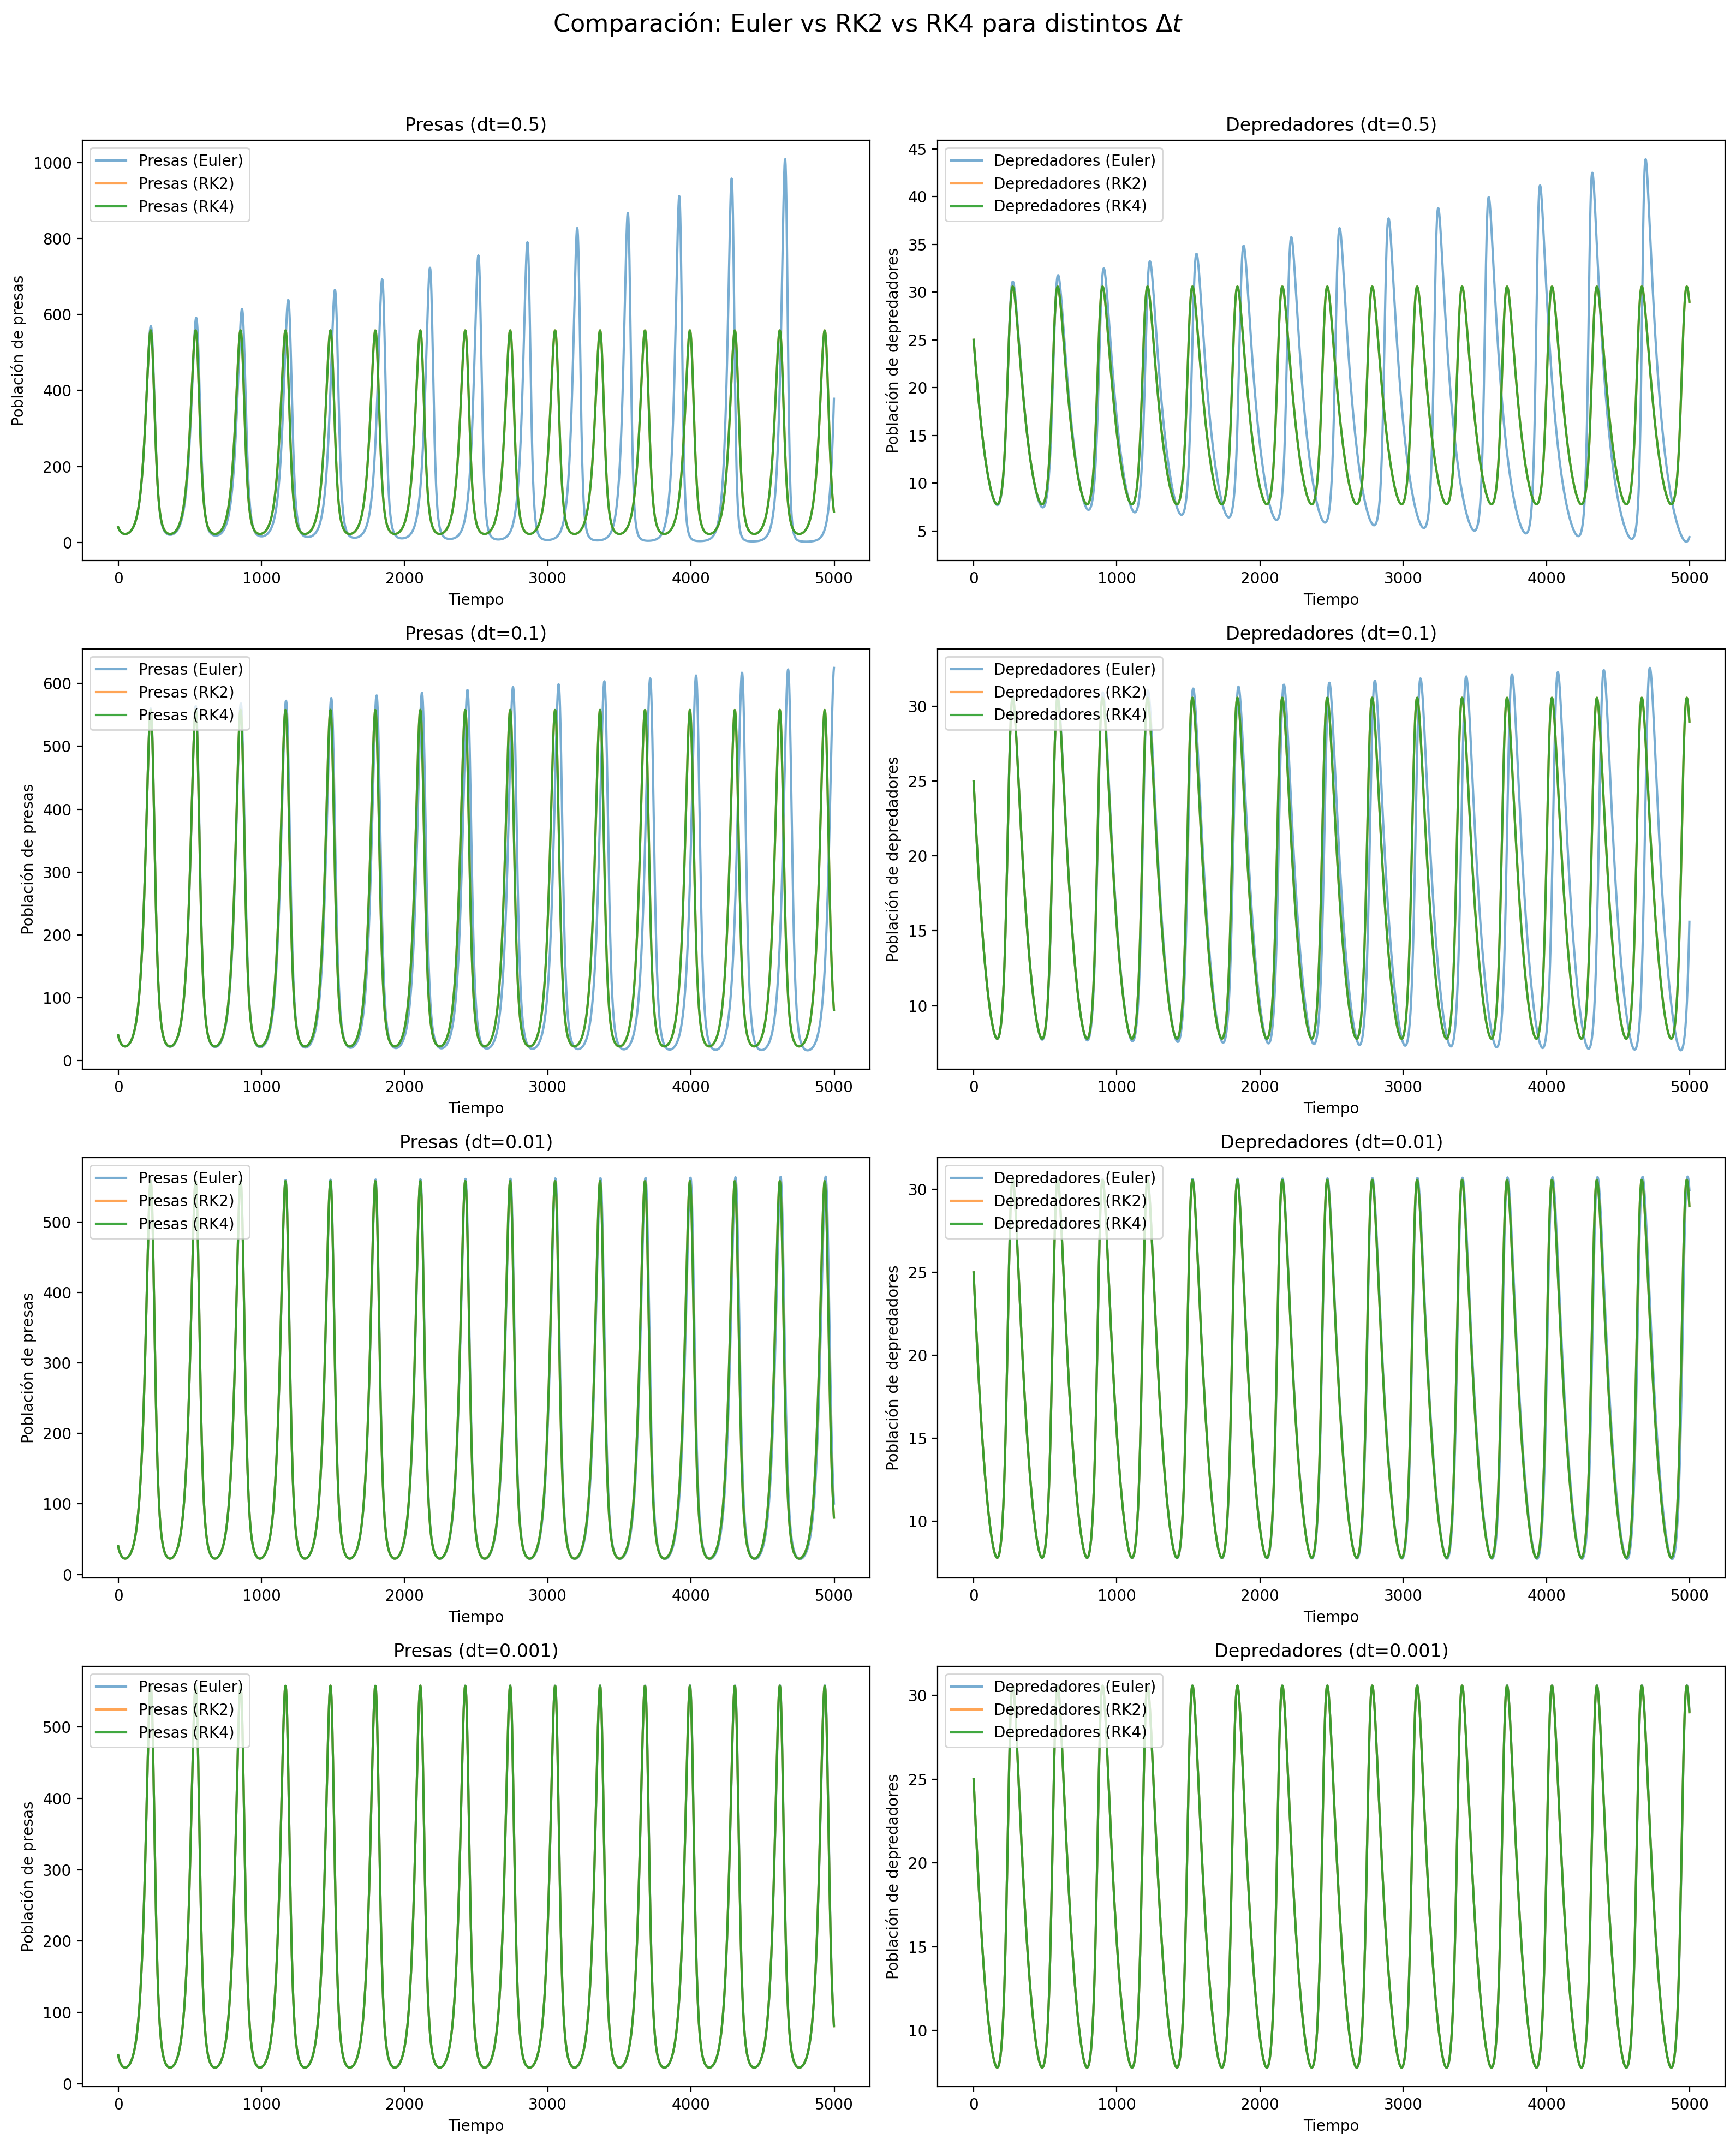

In [11]:
n = len(dt)
fig, axes = plt.subplots(nrows=n, ncols=2, figsize=(16, 5*n), sharex=False)
fig.suptitle(r'Comparación: Euler vs RK2 vs RK4 para distintos $\Delta t$', fontsize=16)

for i, dt_i in enumerate(dt):
    res = results[f"dt_{dt_i}"]
    times = res['times']
    prey_eu = res['prey_eu']
    prey_rk2 = res['prey_rk2']
    prey_rk4 = res['prey_rk4']
    pred_eu = res['pred_eu']
    pred_rk2 = res['pred_rk2']
    pred_rk4 = res['pred_rk4']

    ax_prey = axes[i, 0] if n > 1 else axes[0]
    ax_pred = axes[i, 1] if n > 1 else axes[1]

    ax_prey.plot(times, prey_eu, label='Presas (Euler)', alpha=0.6)
    ax_prey.plot(times, prey_rk2, label='Presas (RK2)', alpha=0.7)
    ax_prey.plot(times, prey_rk4, label='Presas (RK4)', alpha=0.9)
    ax_prey.set_ylabel('Población de presas')
    ax_prey.set_title(f'Presas (dt={dt_i})')
    ax_prey.legend(loc='upper left')

    ax_pred.plot(times, pred_eu, label='Depredadores (Euler)', alpha=0.6)
    ax_pred.plot(times, pred_rk2, label='Depredadores (RK2)', alpha=0.7)
    ax_pred.plot(times, pred_rk4, label='Depredadores (RK4)', alpha=0.9)
    ax_pred.set_ylabel('Población de depredadores')
    ax_pred.set_title(f'Depredadores (dt={dt_i})')
    ax_pred.legend(loc='upper left')

for ax in fig.axes:
    ax.set_xlabel('Tiempo')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## 3. **Análisis de Error**

## 4. **Diagrama de Fase**

## 5. **Análisis de Parámetros**

## 6. **Conclusiones**